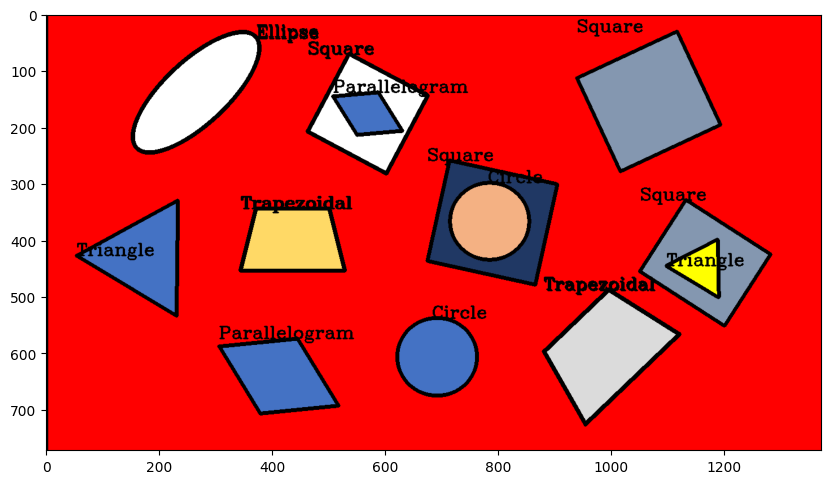

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 載入圖片
img=cv2.imread("./exam1-2.png")
# 轉灰階
img_gray = img[:, :, 2]
# 二值化
_, threshold = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)
# 找輪廓
contours, _ = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    epsilon = 0.01*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img, [cnt], 0, (0, 0, 0), 5)
    # 根據夾角判斷形狀
    x,y = approx[0][0]
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        # 根據長寬、斜率判斷形狀
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        a, b, c, d=approx[:, 0, :]
        m1=((a[1]-b[1])/(a[0]-b[0]))
        m2=((c[1]-d[1])/(c[0]-d[0]))
        m3=((a[1]-d[1])/(a[0]-d[0]))
        m4=((b[1]-c[1])/(b[0]-c[0]))
        if(m1.round()==m2.round())and(m3.round()==m4.round()):
            if(-m2*m4>0.8):
                if aspectRatio >= 1 and aspectRatio < 1.05:
                    cv2.putText(img, "Square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
                else:
                    cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
            else:
                cv2.putText(img, "Parallelogram", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)  
        else:
            cv2.putText(img, "Trapezoidal", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 13:
        cv2.putText(img, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
plt.figure(figsize=(10, 7))
plt.imshow(img[:, :, ::-1])